<h1 align='center'>Previsão do tempo de entrega de comida usando algoritmos de aprendizado de máquina</h1>

Data Scientist Jr.: Karina Gonçalves Soares

A entrega de comida tornou-se um dos serviços de destaque adotados pela indústria de restaurantes. As cidades metropolitanas estão ficando mais movimentadas e conectadas com o trabalho, então as pessoas preferem pedir comida online, pois raramente encontram tempo para fazer compras e cozinhar. Start-ups como Swiggy, Zomato, Dunzo etc. são uma ótima opção de meio para entregar comida à sua porta. Essas startups tornam-se um meio de entrega de comida, e os restaurantes se tornam o local para preparar a comida demandada pelos consumidores. 

A entrega de alimentos é altamente prevalente nas cidades metropolitanas, onde os capitães de entrega podem ser vistos em uma taxa mais alta. Estes capitães recebem a encomenda do comprador e quando a aceitam, inicia-se o processo de encomenda e termina-se com a entrega da comida ao cliente. Os clientes fornecem uma classificação assim que o pedido é concluído e há muitos fatores de satisfação que dependem das classificações. O cliente dá uma nota pós-entrega para o serviço de entrega e outra nota com a refeição para a qualidade da comida. O cliente pede novamente do mesmo restaurante se a qualidade da comida for boa e também do mesmo prestador de serviços se o serviço de entrega for satisfatório e, assim, cria uma demanda para esse restaurante por comida e serviço de entrega.

Com a correria do dia-a-dia surgiu a preferência por pedir comida em Delivery como Ifood e outras. A partir do momento que um restaurante e/ou uma empresa de Delivery aceitam o seu pedido eles se submetem a avaliação, que se for dada por satisfeita, levara o cliente solicitar os serviços dessa empresa novamente. Nesse repositório vamos análisar o tempo de entrega de comida usando o algoritmo Machine Learning para análise e aprendizado de máquina.

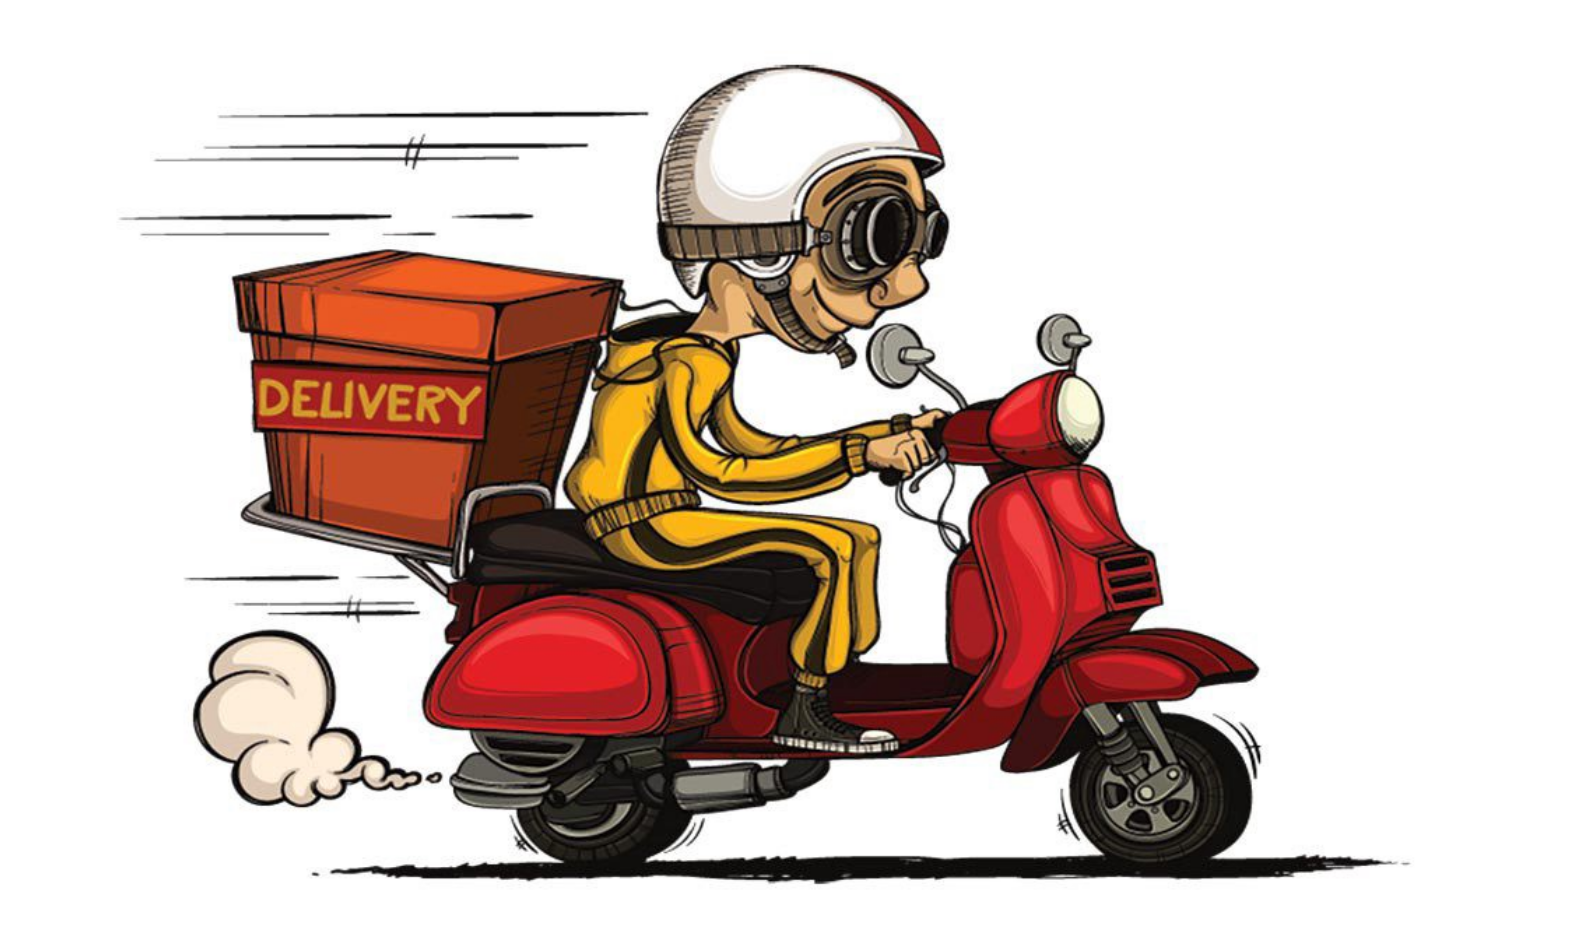

### Importação dos Dados

In [1]:
import numpy as np # Biblioteca cientifíca de operações matemáticas e matrizes 
import pandas as pd # Análise de dados tabulados

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Ignorar mensagens de erro
import warnings
warnings.filterwarnings('ignore')

### Análise Exploratória de Dados

In [3]:
# Abrindo o arquivo para leitura
df = pd.read_csv('/home/karinag/karina_python/git-hub/ML_food_delivery_end-to-end/data/food_delivery_train.csv')

In [4]:
# Visualizando as 5 primeiras linhas
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
# Visualizando as 5 últimas linhas
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


In [6]:
# Visualização randômica dos dados
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
37508,0x66a8,INDORES04DEL03,26,2.8,22.753659,75.903365,22.843659,75.993365,23-03-2022,23:20:00,23:25:00,conditions Sunny,Low,2,Meal,scooter,1,No,Metropolitian,(min) 38
42874,0x713c,PUNERES12DEL02,34,5,18.520016,73.830547,18.570016,73.880547,17-03-2022,22:00:00,22:15:00,conditions Windy,Jam,2,Meal,motorcycle,1,No,Urban,(min) 30
36231,0xce58,ALHRES03DEL03,33,4.7,25.451517,81.832616,25.541517,81.922616,14-02-2022,19:45:00,20:00:00,conditions Cloudy,Jam,1,Drinks,motorcycle,1,No,Metropolitian,(min) 49
29718,0x371b,BANGRES03DEL02,36,4.4,12.979166,77.640709,12.999166,77.660709,05-04-2022,08:25:00,08:40:00,conditions Windy,Low,0,Snack,motorcycle,0,No,NaN,(min) 30
386,0x2258,JAPRES07DEL03,26,4.7,26.766536,75.837333,26.826536,75.897333,09-03-2022,22:45:00,22:55:00,conditions Windy,Low,2,Snack,motorcycle,0,No,Metropolitian,(min) 14


In [7]:
# Dimensão dos dados, Linha Vs Colunas.
df.shape

(45593, 20)

In [8]:
# Visualizando as colunas do meu dataset.
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Feature Engineering

In [10]:
# Eliminando as strs  da coluna "Time_taken(min)" e convertendo para o tipo numérico adequado.

df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', "").astype(pd.Int64Dtype())

In [11]:
# Eliminando linhas NaN.
# Identificando os valores numéricos e substituindo os valores não numéricos (strings) por NaN
numeric_values = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['Delivery_person_Ratings'] = numeric_values

# Eliminando as linhas com NaN na coluna
df.dropna(subset=['Delivery_person_Ratings'], inplace=True)

# Convertendo a coluna para o tipo numérico adequado (Forçando o type dos dados)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(np.array(df['Delivery_person_Ratings'],dtype='float64'))
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(np.array(df['Delivery_person_Age'],dtype='float64'))
df['Time_taken(min)'] = df['Time_taken(min)'].astype(np.array(df['Time_taken(min)'],dtype='float64'))


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43685 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43685 non-null  object 
 1   Delivery_person_ID           43685 non-null  object 
 2   Delivery_person_Age          43685 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          43685 non-null  float64
 5   Restaurant_longitude         43685 non-null  float64
 6   Delivery_location_latitude   43685 non-null  float64
 7   Delivery_location_longitude  43685 non-null  float64
 8   Order_Date                   43685 non-null  object 
 9   Time_Orderd                  43685 non-null  object 
 10  Time_Order_picked            43685 non-null  object 
 11  Weatherconditions            43685 non-null  object 
 12  Road_traffic_density         43685 non-null  object 
 13  Vehicle_condition    

In [13]:
# Eliminando as linhas com NaN na coluna
df.dropna(subset=['Delivery_person_Age'], inplace=True)

In [14]:
# Apagando colunas que não serão utilizadas
df = df.drop(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival','City'], axis=1)

In [15]:
# Atualizando o índice
df.reset_index()

,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24.0
1,1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33.0
2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26.0
3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21.0
4,4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43680,45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32.0
43681,45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36.0
43682,45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16.0
43683,45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26.0


In [16]:
# Eliminando linhas duplicadas
df = df.drop_duplicates()

In [17]:
# Verificando se há alguma linha duplicada
# Percebemos que não temos linhas duplicadas
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
45588    False
45589    False
45590    False
45591    False
45592    False
Length: 43685, dtype: bool>

In [18]:
# Verificando se possui algum valor nulo
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [19]:
# Verificando as informções do dataset após a sua limpeza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43685 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43685 non-null  object 
 1   Delivery_person_ID           43685 non-null  object 
 2   Delivery_person_Age          43685 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          43685 non-null  float64
 5   Restaurant_longitude         43685 non-null  float64
 6   Delivery_location_latitude   43685 non-null  float64
 7   Delivery_location_longitude  43685 non-null  float64
 8   Type_of_order                43685 non-null  object 
 9   Type_of_vehicle              43685 non-null  object 
 10  Time_taken(min)              43685 non-null  float64
dtypes: float64(7), object(4)
memory usage: 4.0+ MB


In [20]:
# Linhas Vs Colunas
df.shape

(43685, 11)

In [21]:
# Visualização randômica dos dados
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
2529,0xa552,CHENRES010DEL01,30.0,4.2,13.066762,80.251865,13.136762,80.321865,Snack,motorcycle,37.0
42547,0xdce7,GOARES17DEL01,39.0,4.7,15.496162,73.825364,15.606162,73.935364,Meal,motorcycle,27.0
20071,0x625c,MUMRES12DEL03,22.0,4.8,19.207222,72.972281,19.237222,73.002281,Meal,electric_scooter,13.0
14234,0xadb6,MUMRES17DEL03,32.0,5.0,19.121999,72.908493,19.181999,72.968493,Meal,motorcycle,34.0
36261,0xd494,AGRRES19DEL03,37.0,5.0,0.000000,0.000000,0.030000,0.030000,Meal,scooter,38.0


In [22]:
# Descrição estatística do dados
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000
mean,29.567861,4.633780,17.214543,70.668593,17.458164,70.829376,26.289024
std,5.814436,0.334716,7.750885,21.459258,7.339296,21.136728,9.369354
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.103162,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Com o `describe` obeservamos os valores não nulos, média, desvio padrão (distância dos valores da média), os quartis onde mostra os valores abaixo de 25% dos dados, 50% e 75% e tabém podemos análisar valores máximo e minimo de cada coluna.

In [23]:
# Verificando valore únicos 
df.nunique()

ID                             43685
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              519
Restaurant_longitude             415
Delivery_location_latitude      4366
Delivery_location_longitude     4366
Type_of_order                      4
Type_of_vehicle                    4
Time_taken(min)                   45
dtype: int64

In [24]:
# Separando colunas por categoria/type

object_columns = df.select_dtypes(include='object').columns
print("Colunas do tipo object: ")
print(object_columns)
print('\n')

numerical_columns = df.select_dtypes(include=['float64']).columns
print("Colunas do tipo Numérica:")
print(numerical_columns)

Colunas do tipo object: 
Index(['ID', 'Delivery_person_ID', 'Type_of_order', 'Type_of_vehicle'], dtype='object')


Colunas do tipo Numérica:
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_taken(min)'],
      dtype='object')


Aqui, estamos usando o método `select_dtypes` do DataFrame df. Este método é usado para selecionar colunas com base nos tipos de dados delas. O argumento `include='object'` especifica que queremos selecionar apenas as colunas do tipo "objeto".

### Vizualização dos Dados

#### 1. Distribuição dos tipos de  Pedidos

In [25]:
# Visualizando valores únicos da coluna Type_of_order
df['Type_of_order'].unique()    

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [26]:
# Verificando quantas vezes cada valor aparece 
df['Type_of_order'].value_counts()

Type_of_order
Snack      11041
Meal       10971
Drinks     10861
Buffet     10812
Name: count, dtype: int64

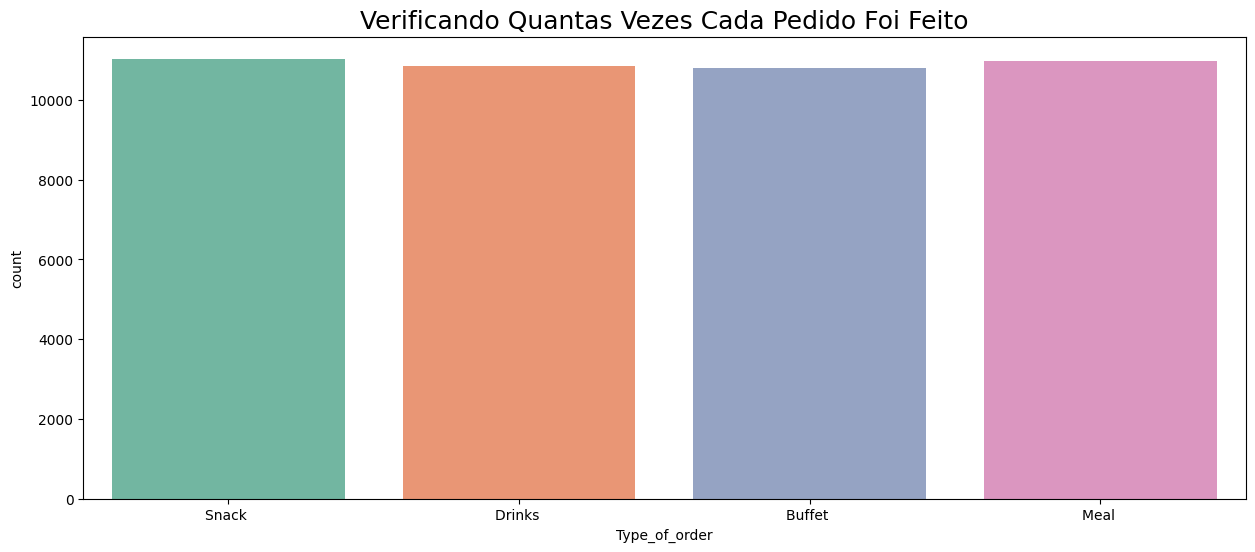

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Type_of_order', data=df, palette='Set2')
plt.title('Verificando Quantas Vezes Cada Pedido Foi Feito', fontsize=18)
plt.xticks(rotation=0)
plt.show()

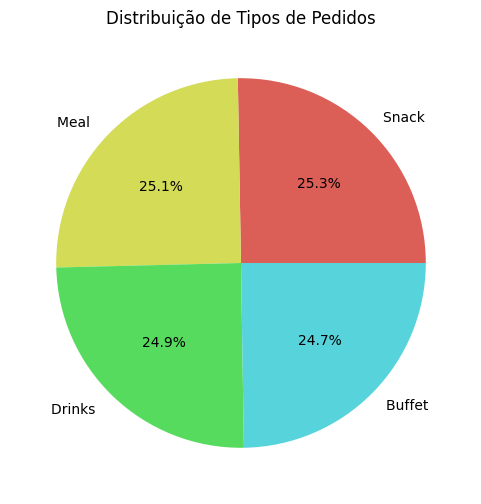

In [28]:
plt.figure(figsize=(15, 6))
contagem_de_ocorrencias = df['Type_of_order'].value_counts()
plt.pie(contagem_de_ocorrencias, labels=contagem_de_ocorrencias.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Distribuição de Tipos de Pedidos')
plt.show()

Obs.: Para gerar o seguinte gráfico é necessário atualizar os seguites pacotes.

* pip install nbformat
* pip install nbformat --upgrade
* pip install --upgrade plotly


In [29]:
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data=[go.Bar(x=df['Type_of_order'].value_counts().index, y=df['Type_of_order'].value_counts())])
fig.update_layout(
title= 'Tipos de Pedidos',
xaxis_title="Categorias",
yaxis_title="Contagem"
)
fig.show()

In [31]:
contagem_de_ocorrencias = df['Type_of_order'].value_counts()
fig = go.Figure(data=[go.Pie(labels=contagem_de_ocorrencias.index, values=contagem_de_ocorrencias)])
fig.update_layout(title= 'Distribuição de Tipos de Pedidos')
fig.show()

#### 2. Distribuição dos Tipos de Veículos utilizados na entrega

In [32]:
# Visualizando valores únicos
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [33]:
# Verificando quantas vezes cada valor se repete
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           25494
scooter              14622
electric_scooter      3554
bicycle                 15
Name: count, dtype: int64

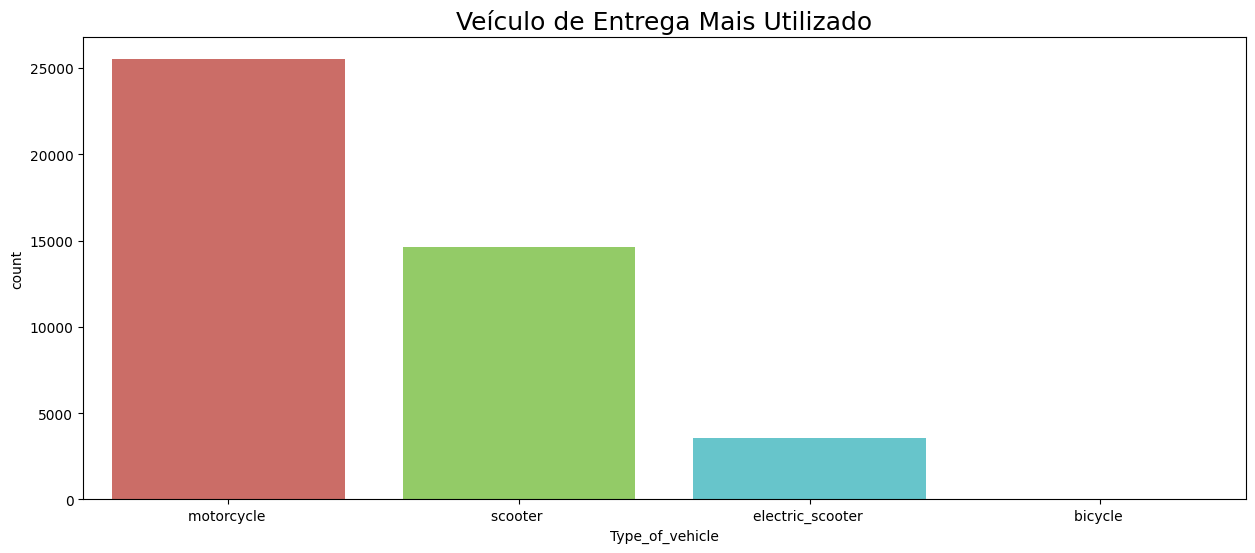

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Type_of_vehicle', data=df, palette='hls')
plt.title('Veículo de Entrega Mais Utilizado', fontsize=18)
plt.xticks(rotation=0)
plt.show()


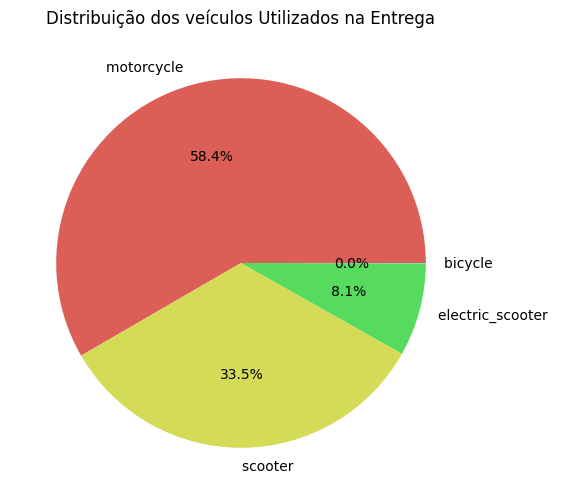

In [35]:
plt.figure(figsize=(15, 6))
counts = df['Type_of_vehicle'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Distribuição dos veículos Utilizados na Entrega')
plt.show()

In [36]:
fig = go.Figure(data=[go.Bar(x=df['Type_of_vehicle'].value_counts().index, y=df['Type_of_vehicle'].value_counts())])
fig.update_layout(
title= 'Tipos de Veículos',
xaxis_title="Categorias",
yaxis_title="Contagem"
)
fig.show()

In [37]:
counts = df['Type_of_vehicle'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Distribuição dos veículos Utilizados na Entrega')
fig.show()

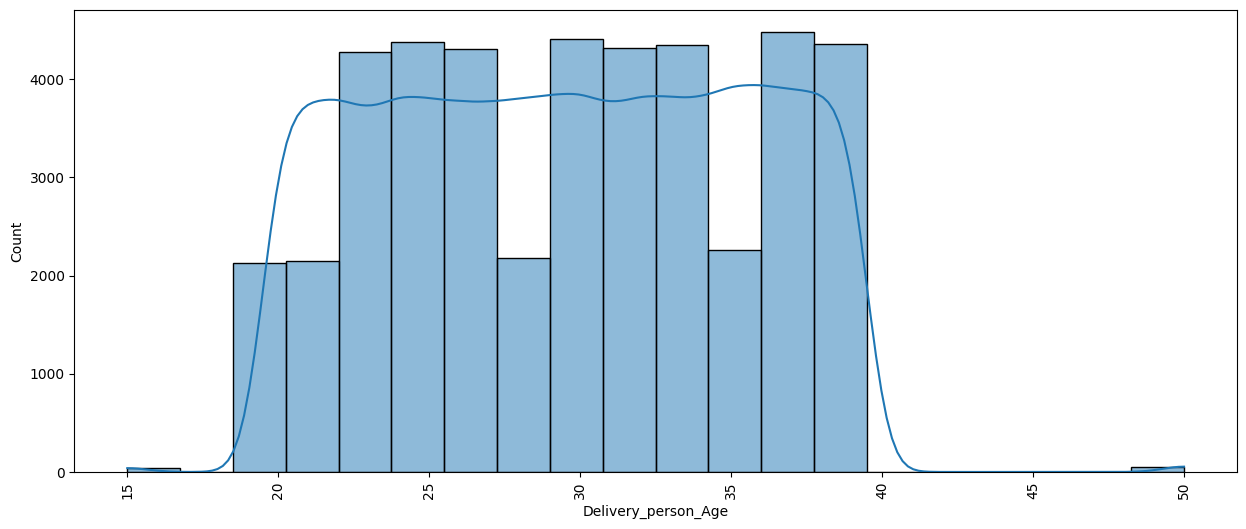

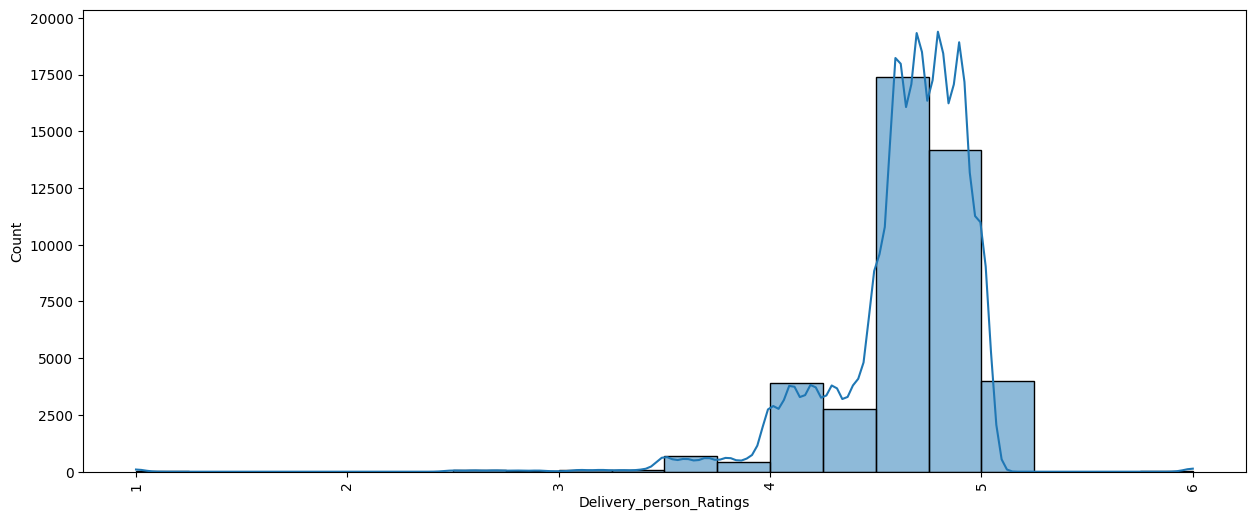

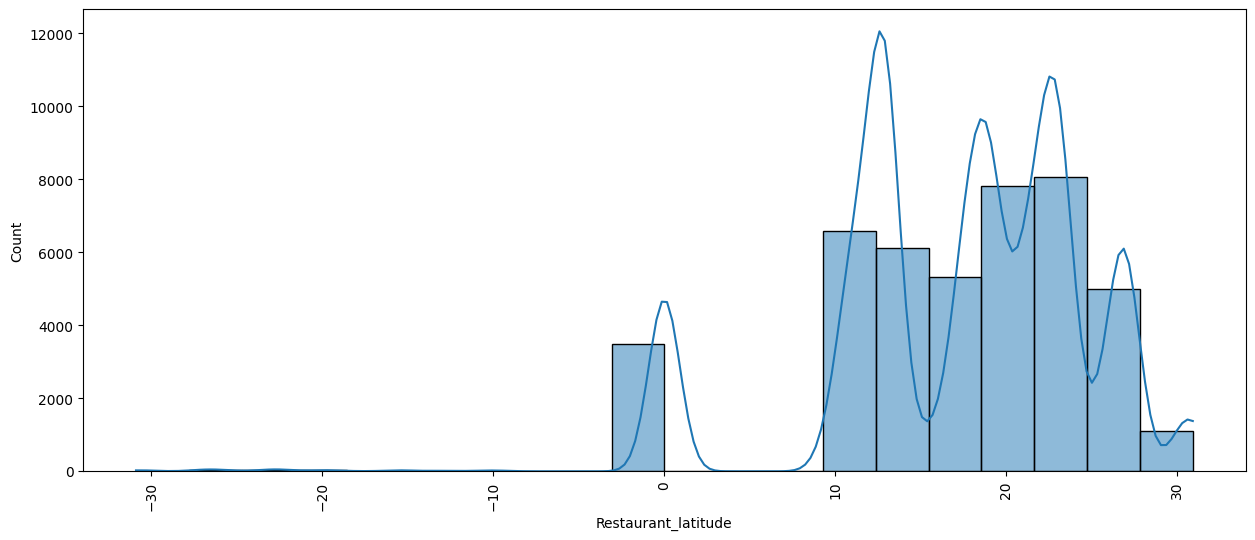

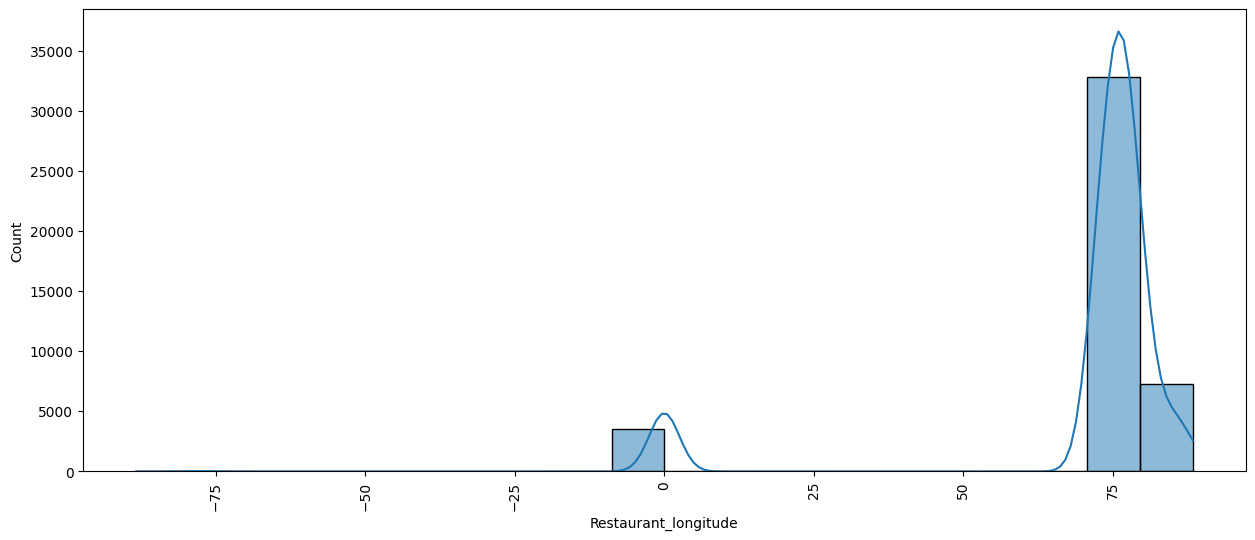

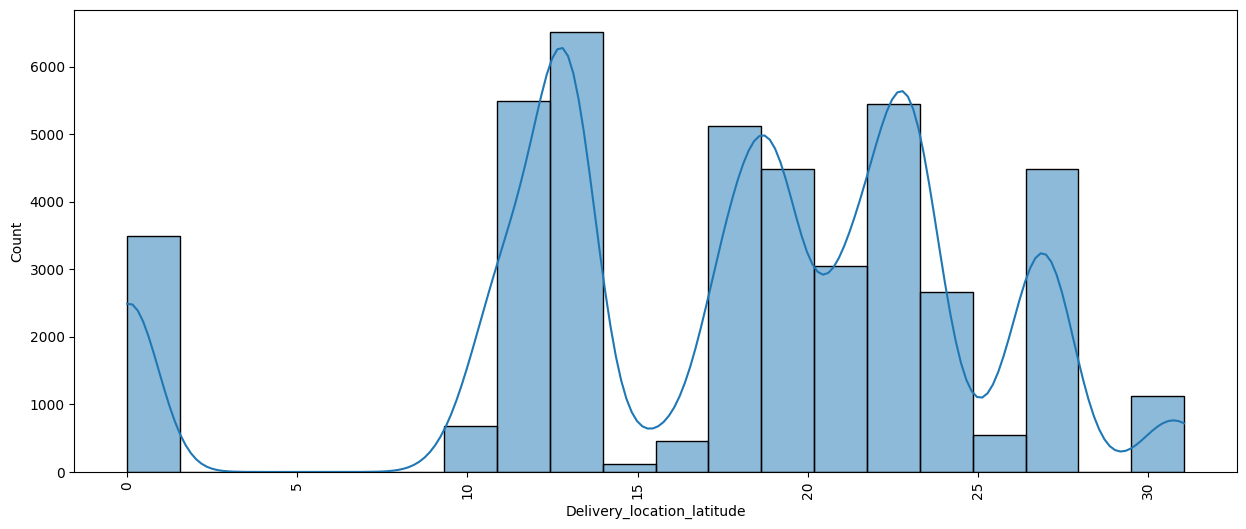

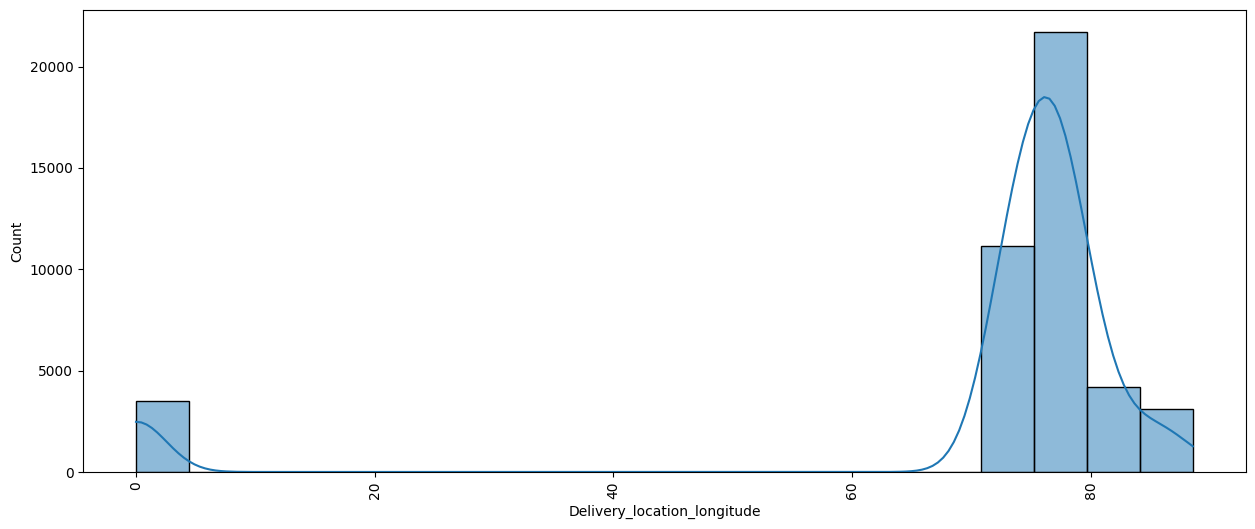

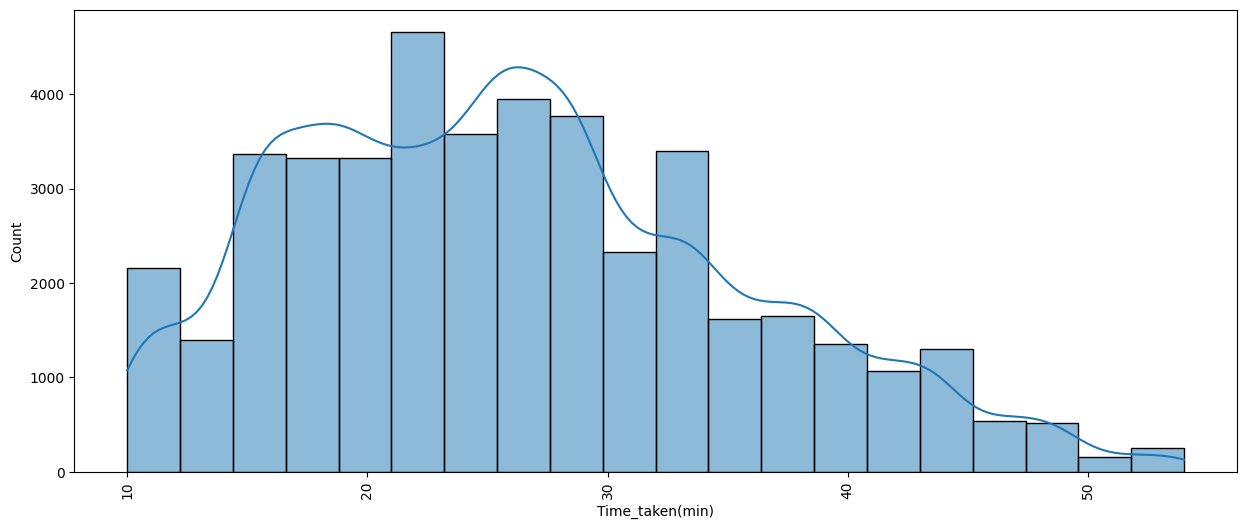

In [38]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

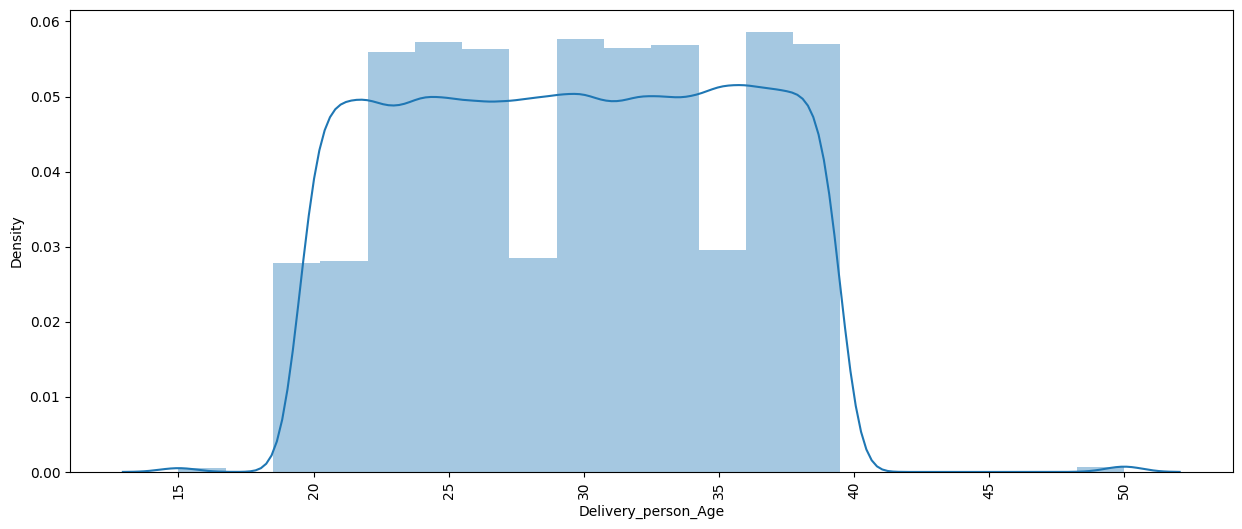

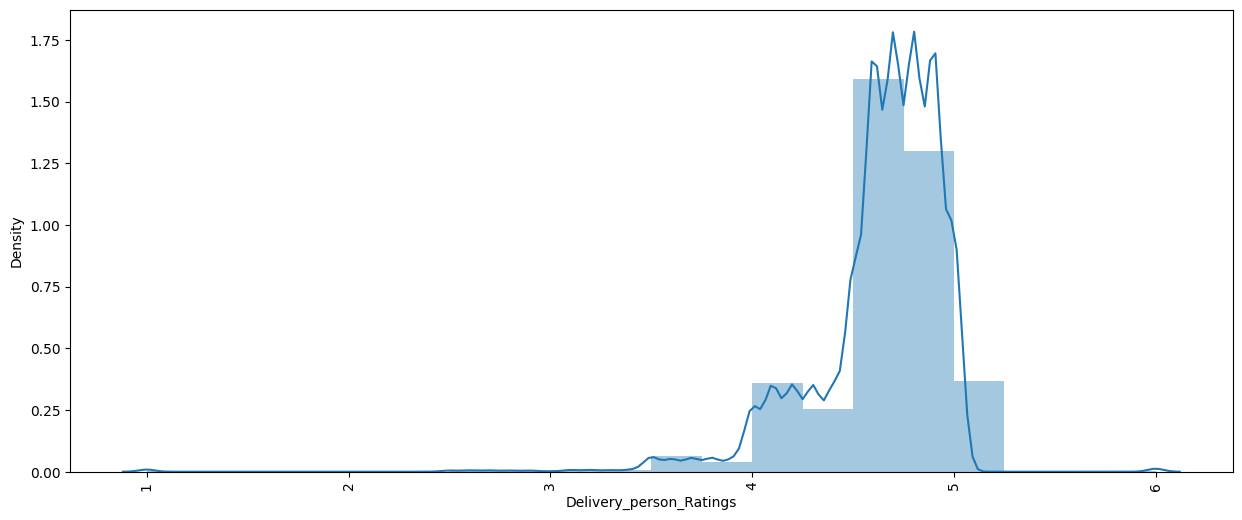

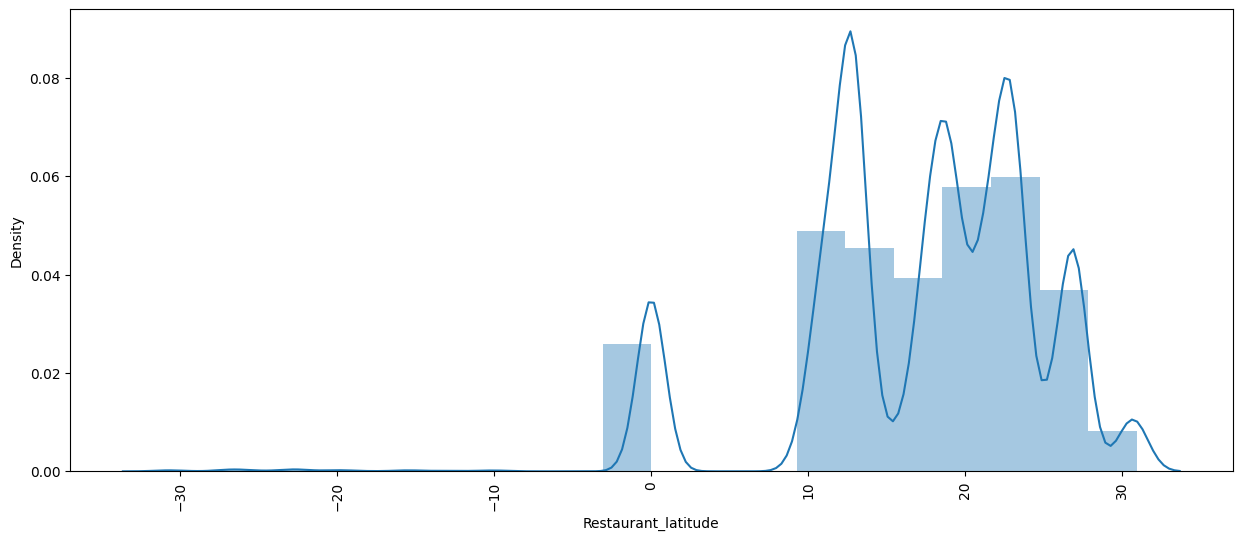

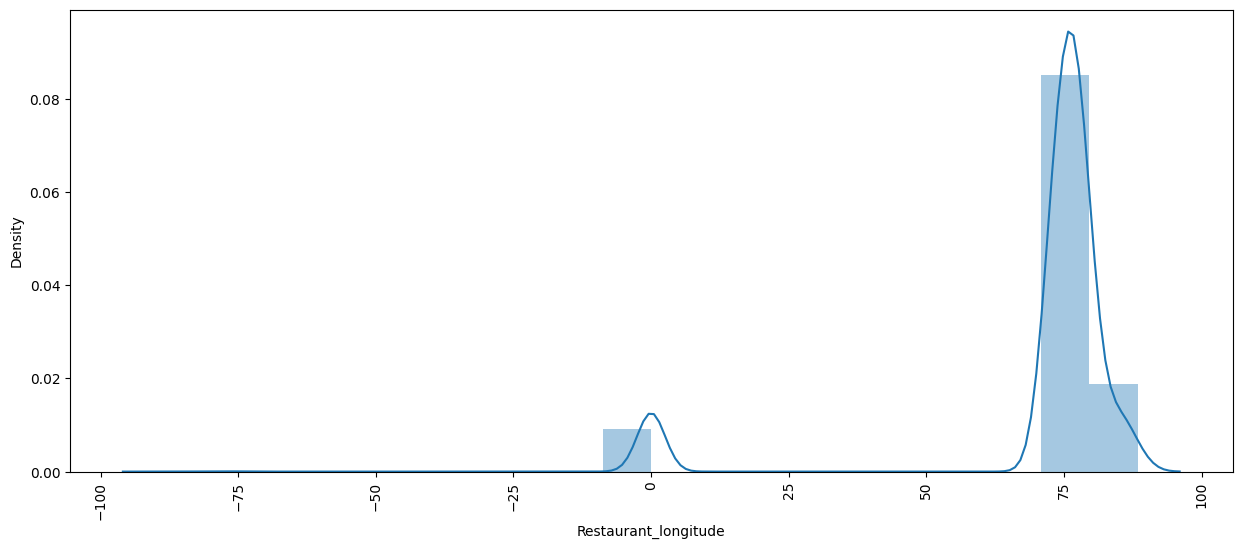

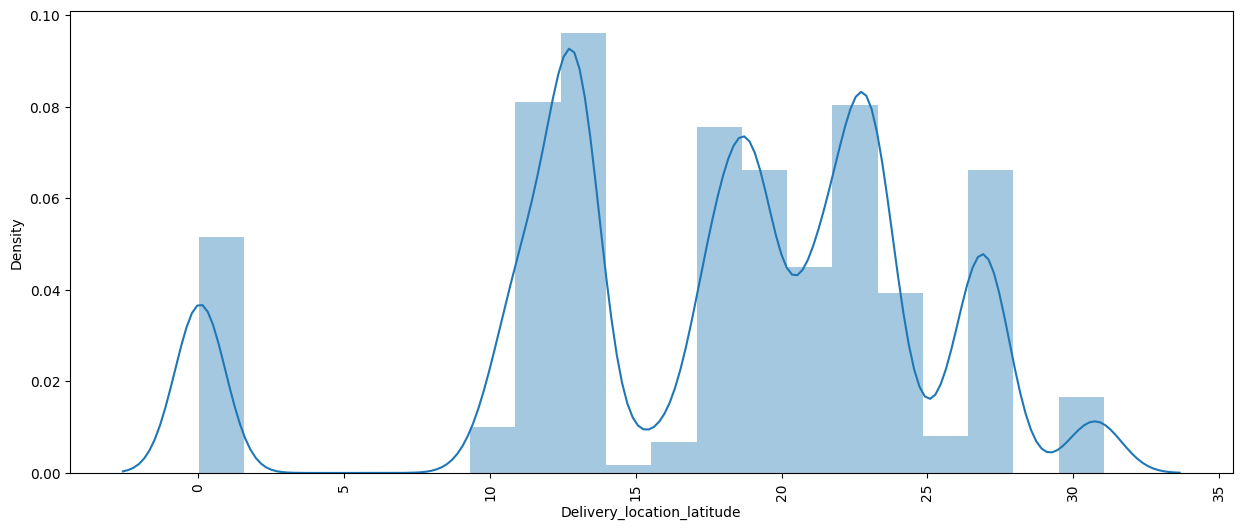

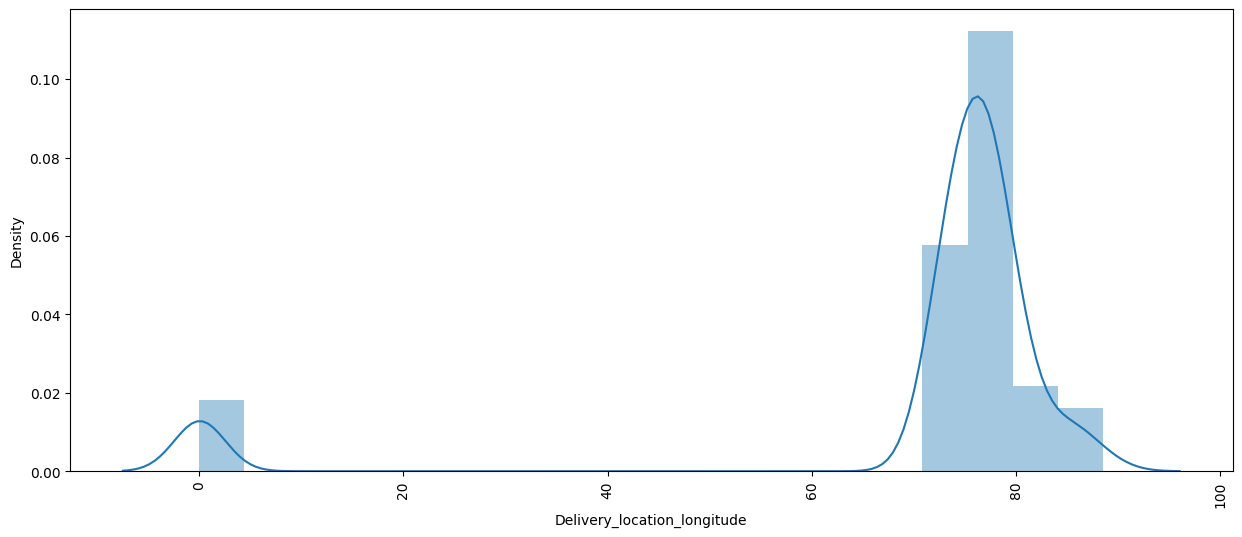

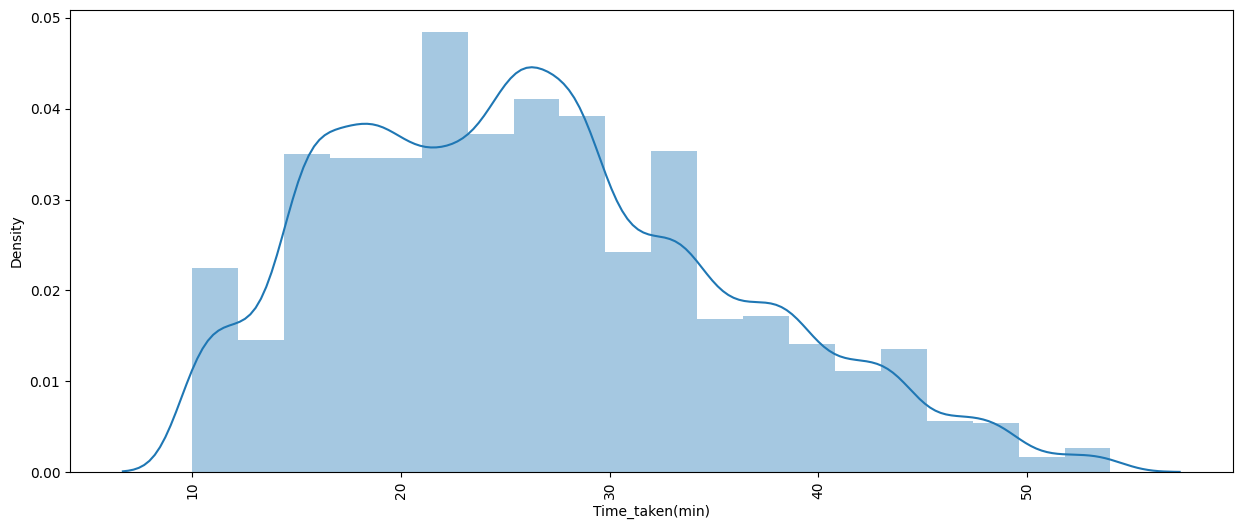

In [39]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

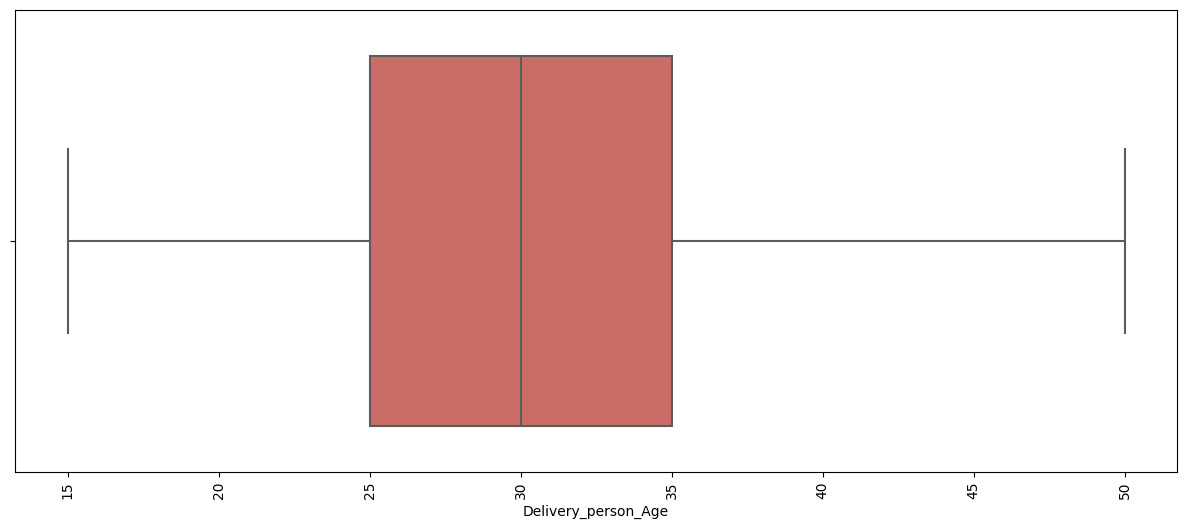

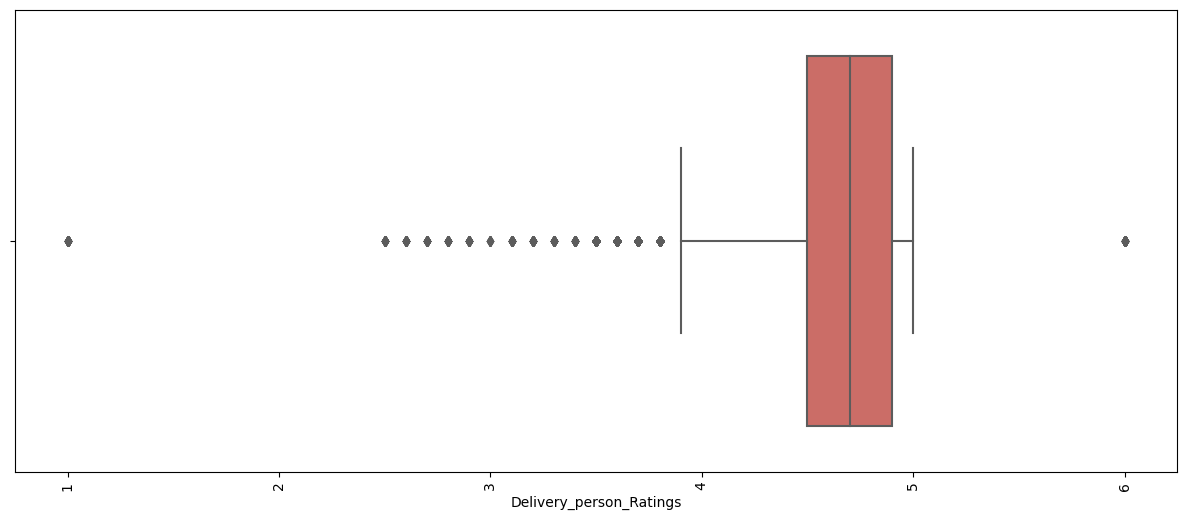

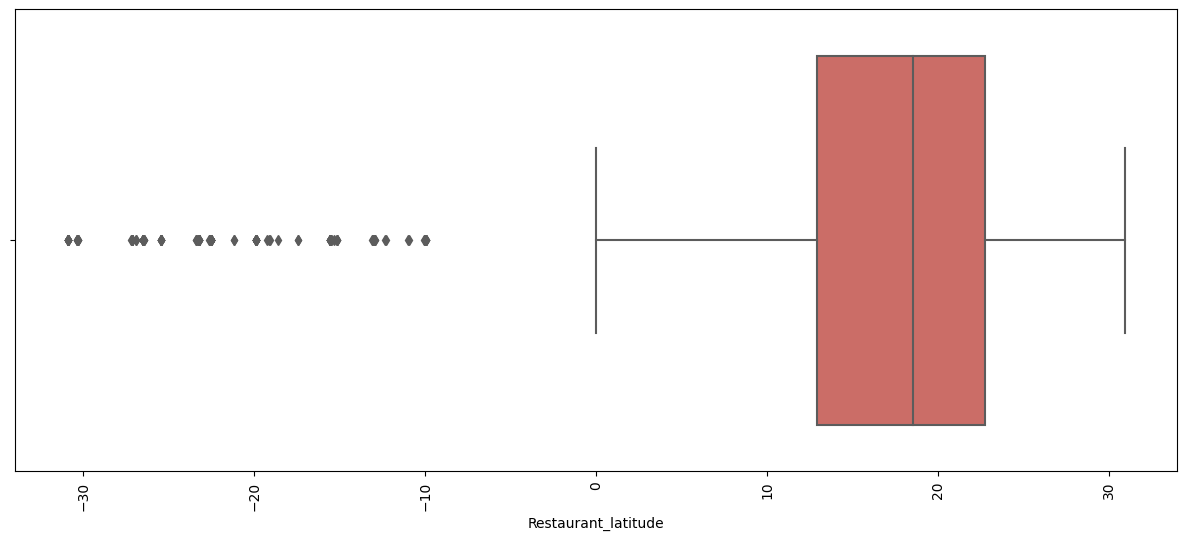

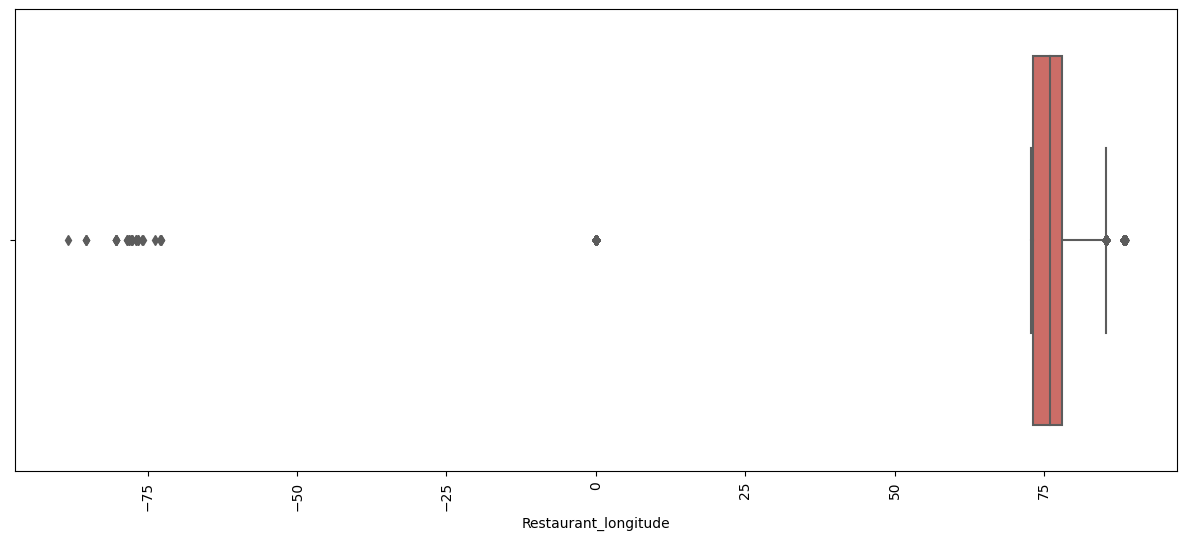

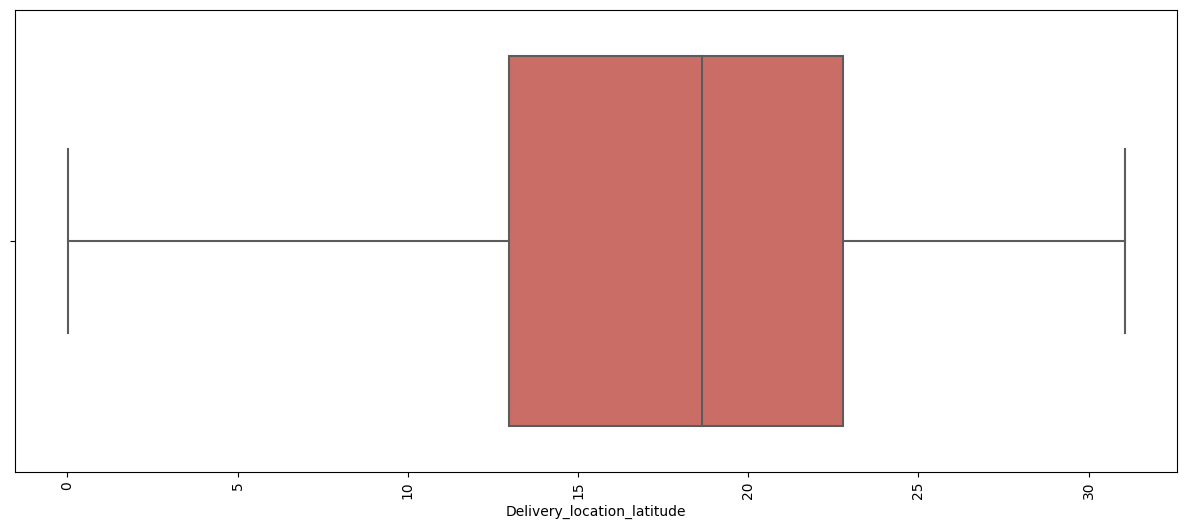

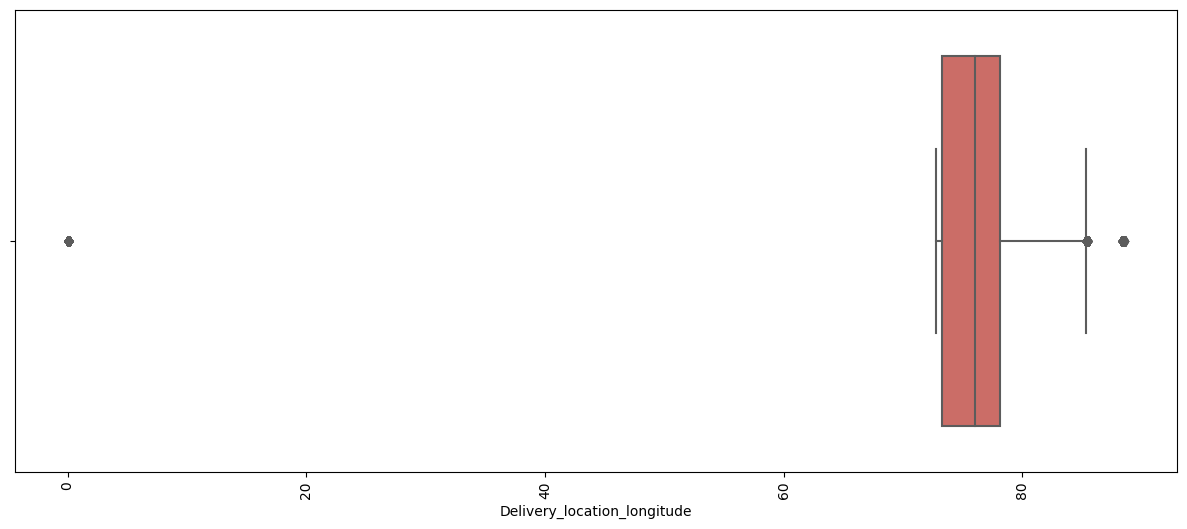

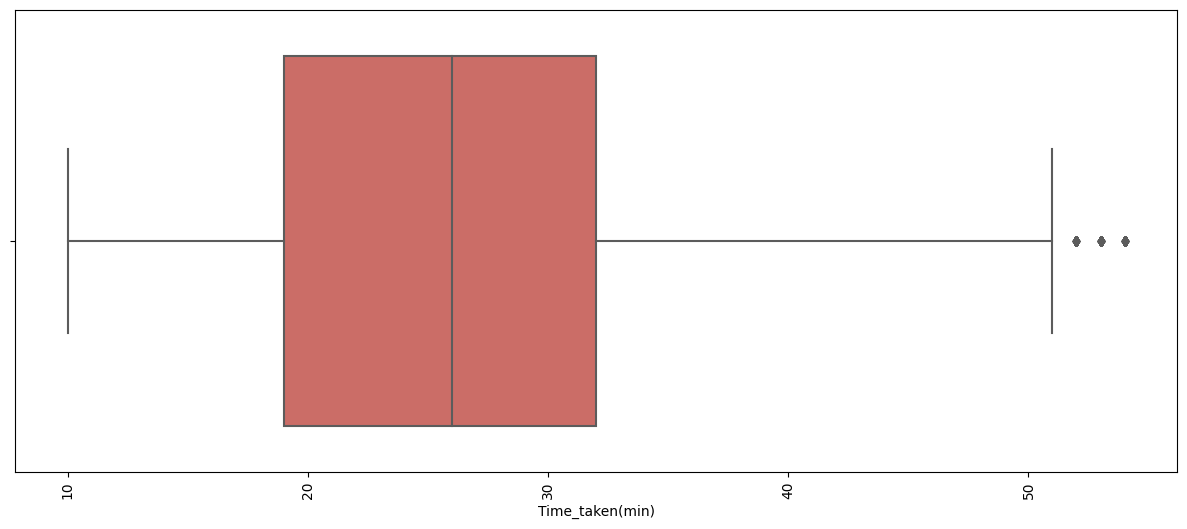

In [40]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i, data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [41]:
#num_cols = np.array(numerical_columns,dtype='float64')

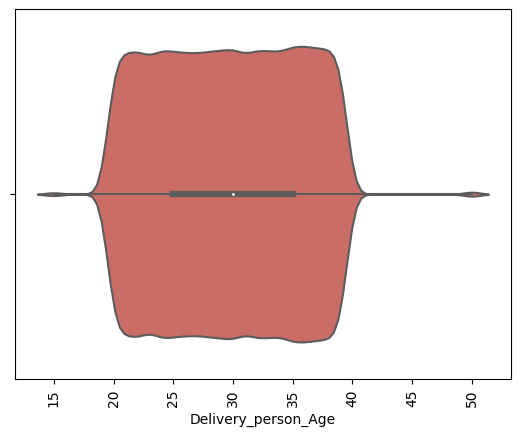

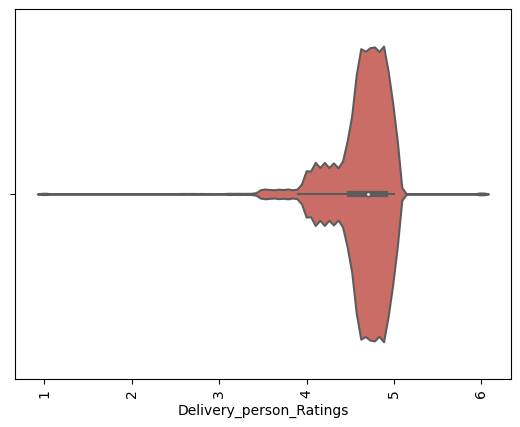

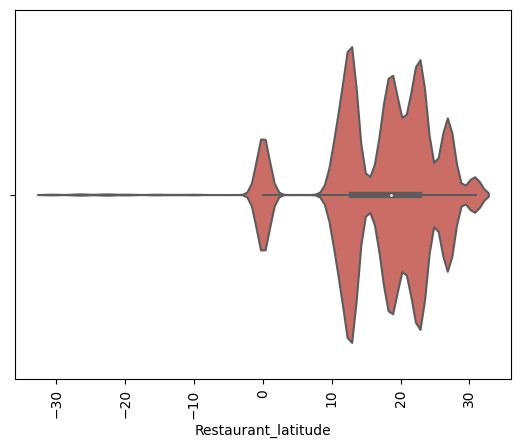

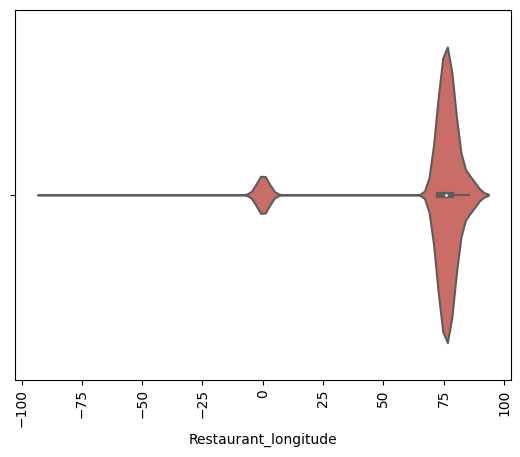

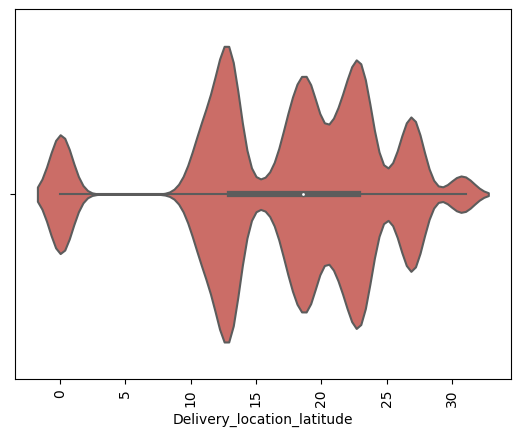

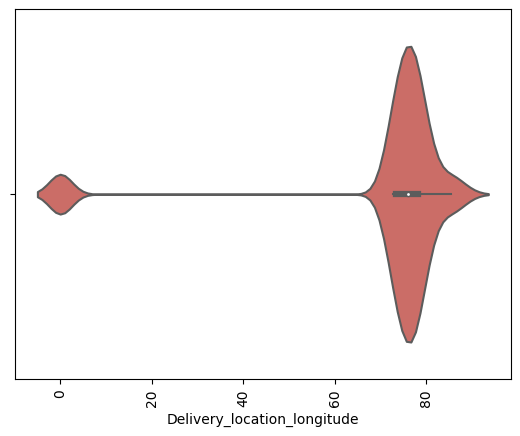

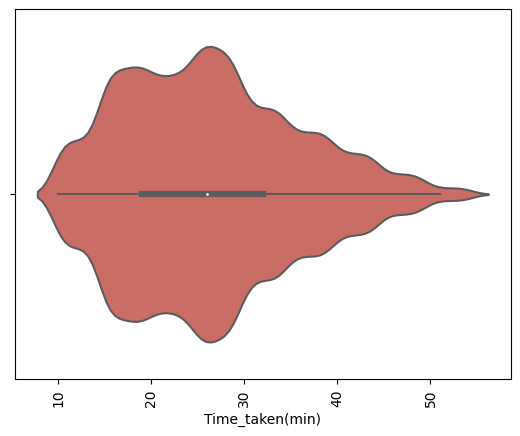

In [42]:
for i in numerical_columns:
    #plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()